In [1]:
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}



In [2]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


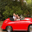

In [3]:
itorch.image(trainset.data[100])

In [4]:
print(classes[trainset.label[100]])


automobile	


In [5]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [6]:
print(trainset:size())
print(trainset[33])

10000	
{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


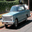

In [7]:
        itorch.image(trainset[33][1])

In [8]:
redChannel = trainset.data[{{},{1}, {}, {}}]


In [9]:
print(#redChannel)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



In [10]:
trainset[{{150, 300}}]

{
  1 : DoubleTensor - size: 151x3x32x32
  2 : ByteTensor - size: 151
}


In [11]:
mean = {}
stdv = {}
for i=1,3 do
    mean[i] = trainset.data[{{}, {i}, {}, {}}]:mean()
    print('Channel '..i..', Mean: '..mean[i])
    trainset.data[{{}, {1}, {}, {}}]:add(-mean[i])
    
    stdv[i] = trainset.data[{{}, {1}, {}, {}}]:std()
    print('Channel '..i..', Std: '..stdv[i])
    trainset.data[{{}, {1}, {}, {}}]:div(stdv[i])
end


Channel 1, Mean: 125.83175029297	


Channel 1, Std: 63.143400842609	


Channel 2, Mean: 123.26066621094	


Channel 2, Std: 1.000000000008	


Channel 3, Mean: 114.03068681641	


Channel 3, Std: 0.99999999998938	


In [12]:
require 'nn'

{
  VolumetricMaxUnpooling : table: 0x1ebadb78
  ConcatTable : table: 0x1ebb75a8
  MV : table: 0x1ebfc568
  SpatialAveragePooling : table: 0x1eac5cb8
  SpatialConvolutionMM : table: 0x1ead3248
  Reshape : table: 0x0c1e3a60
  Jacobian : 
    {
      forward : function: 0x1ec046a8
      testAllUpdate : function: 0x1ec04828
      testDiagHessianInput : function: 0x1ec047a8
      testDiagHessianWeight : function: 0x1ec047c8
      testDiagHessianBias : function: 0x1ec047e8
      testDiagHessian : function: 0x1ec04788
      testJacobian : function: 0x1ec04728
      testIO : function: 0x1ec04808
      testJacobianUpdateParameters : function: 0x1ec04768
      backwardDiagHessian : function: 0x1ec046c8
      testJacobianParameters : function: 0x1ec04748
      backwardUpdate : function: 0x1ec04688
      forwardUpdate : function: 0x1ec04708
      backward : function: 0x1ec04630
      linearModuleDiagHessian : function: 0x1ec046e8
    }
  SparseLinear : table: 0x0c1b4840
  SoftMarginCriterion : ta

ation : table: 0x1ebb0b10
  ClassSimplexCriterion : table: 0x1ebd5300
  Contiguous : table: 0x0c1ca8c0
  FlattenTable : table: 0x1ebc3508
  PReLU : table: 0x1eb0d6d0
  utils : 
    {
      contiguousView : function: 0x0c54fda0
      recursiveType : function: 0x0c54fd60
      recursiveResizeAs : function: 0x1eab2370
      recursiveAdd : function: 0x0c55aec0
      clear : function: 0x1eab23b0
      addSingletonDimension : function: 0x0c55aee0
      recursiveFill : function: 0x1eab2390
    }
  JoinTable : table: 0x1ebbaf00
  ClassNLLCriterion : table: 0x1ebd20f0
  CMul : table: 0x1ea9f368
  CosineDistance : table: 0x0c15bc68
  Index : table: 0x0c1933d8
  Mean : table: 0x0c1faad0
  Dropout : table: 0x1ea9d750
  SoftPlus : table: 0x0c159d00
  SpatialDivisiveNormalization : table: 0x1eae5278
  L1Penalty : table: 0x1ebed6e0
  test : function: 0x1ec7be68
  Power : table: 0x1eb9f428
  Sqrt : table: 0x1eb9ec10
  Sequential : table: 0x1eaa74c0
  MM : table: 0x1ebf98c8
  ParallelCriterion : table:

In [13]:

net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet5\n' .. net:__tostring());

  Normalize : table: 0x0c1a5c20
  SpatialSoftMax : table: 0x1eaf3858
  SelectTable : table: 0x1ebbc650
  SpatialFractionalMaxPooling : table: 0x1eac1740
}
Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(3 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


In [14]:
criterion = nn.ClassNLLCriterion()


In [15]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5

In [ ]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 2.1685562169835	


# current error = 1.9875203058007	


# current error = 1.9294535370778	


# current error = 1.8621449594778	


In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

In [ ]:
testset.data = testset.data:double()
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

In [ ]:
horse = testset.data[100]
print(horse:mean(), horse:std())

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [ ]:
print(predicted:exp())


In [ ]:
for i = 1, predicted:size(1) do
    print(classes[i], predicted[i])
end

In [ ]:
correct = 0
for i = 1, 10000 do
    local groundTruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)
    
    if groundTruth == indices[1] then
        correct = correct + 1
    end
end

In [ ]:
print(correct, 100*correct / 10000 .. '%')

In [ ]:
class_perf = {0,0,0,0,0,0,0,0,0,0}
for i = 1, 10000 do
    local groundTruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)
    
    if groundTruth == indices[1] then
        class_perf[groundTruth] = class_perf[groundTruth] + 1
    end
end

In [ ]:
for i=1,#classes do
    print(classes[i], 100*class_perf[i]/1000 ..'%')
end